# NMF
*Reference: https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf*

In [30]:
## defining all utilty functions - needed for Data cleaning and processing

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text


def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text):
    pattern = r"(?u)\b\w\w+\b"
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text):
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [31]:
import json

with open('sample.json', 'r') as file:
    sample = json.load(file)

In [32]:
import pandas as pd
import numpy as np

In [33]:
comments = sample['comments']
url = sample['web_url']

In [34]:
first_comment = comments[0]

In [35]:
first_comment

"Addicts have been hiding behind the term 'disease' for decades, ever since the inception of addiction as illness. \nIt is not a disease like cancer. And we need to stop conflating it as such. It is a developed syndrome, born of behavior and habit, influenced by external elements. \nIn the end it is the individual who manufacturers the condition and only the individual who can end it. Or at least manage it."

In [36]:
word_count(first_comment)

72

In [37]:
df = pd.DataFrame({'url':url,'body':comments})
df

,url,body
0,https://www.nytimes.com/2023/12/13/opinion/add...,Addicts have been hiding behind the term 'dise...
1,https://www.nytimes.com/2023/12/13/opinion/add...,"To overcome habitual abuse, one must be honest..."
2,https://www.nytimes.com/2023/12/13/opinion/add...,I've been through all of this several times an...
3,https://www.nytimes.com/2023/12/13/opinion/add...,AA has a phrase for it: “Contempt prior to in...
4,https://www.nytimes.com/2023/12/13/opinion/add...,Drug addiction in America?\n\nI don't think it...
...,...,...
333,https://www.nytimes.com/2023/12/13/opinion/add...,1) There are good and bad addiction treatment ...
334,https://www.nytimes.com/2023/12/13/opinion/add...,I'm always amazed at these articles that talk ...
335,https://www.nytimes.com/2023/12/13/opinion/add...,There are regulatory concerns about contingenc...
336,https://www.nytimes.com/2023/12/13/opinion/add...,"Buprenorphine saved my young niece's life, but..."


In [38]:
# Get the word count
df['word_count'] = df['body'].apply(word_count)
df['word_count'].mean()

103.53550295857988

In [39]:
# Process the text
df['processed_text'] = df['body'].apply(process_text)
df.head()

,url,body,word_count,processed_text
0,https://www.nytimes.com/2023/12/13/opinion/add...,Addicts have been hiding behind the term 'dise...,72,"[addict, hide, term, diseas, decad, sinc, ince..."
1,https://www.nytimes.com/2023/12/13/opinion/add...,"To overcome habitual abuse, one must be honest...",55,"[overcom, habitu, abus, honest, oneself, ident..."
2,https://www.nytimes.com/2023/12/13/opinion/add...,I've been through all of this several times an...,262,"[sever, time, final, twenti, year, came, clean..."
3,https://www.nytimes.com/2023/12/13/opinion/add...,AA has a phrase for it: “Contempt prior to in...,42,"[aa, phrase, contempt, prior, investig, don, l..."
4,https://www.nytimes.com/2023/12/13/opinion/add...,Drug addiction in America?\n\nI don't think it...,273,"[drug, addict, america, think, adequ, challeng..."


In [40]:
# Descriptive statistics for word count
df['word_count'].describe()

,word_count
count,338.000000
mean,103.535503
std,70.334008
min,5.000000
25%,49.250000
50%,82.000000
75%,144.750000
max,286.000000


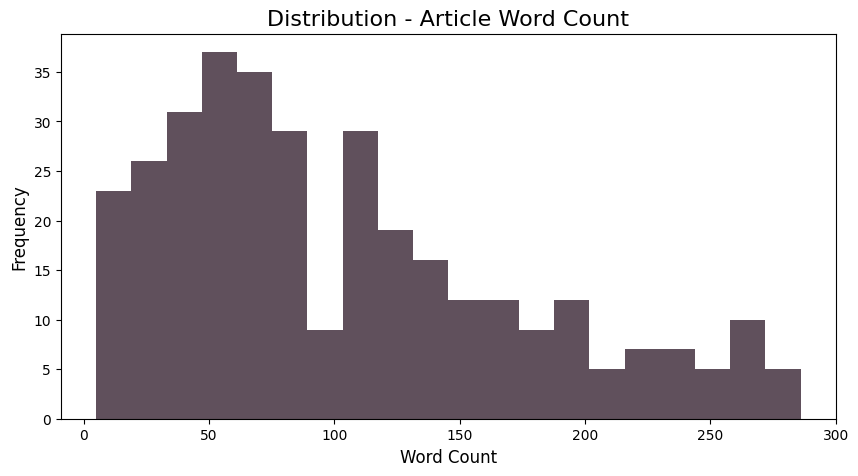

In [41]:
import matplotlib.pyplot as plt

# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)

plt.show()

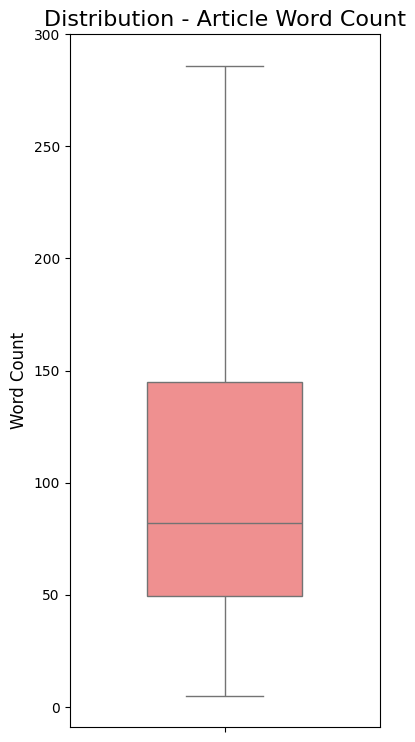

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a boxplot of the word counts
fig = plt.figure(figsize=(4,9))

sns.boxplot(
    df['word_count'],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Article Word Count', fontsize=16)

plt.show()

In [43]:
from collections import Counter

# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,addict,554
1,drug,290
2,peopl,251
3,use,157
4,need,149
5,treatment,145
6,mani,116
7,work,110
8,alcohol,106
9,help,106


/tmp/ipython-input-448636294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/tmp/ipython-input-448636294.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(


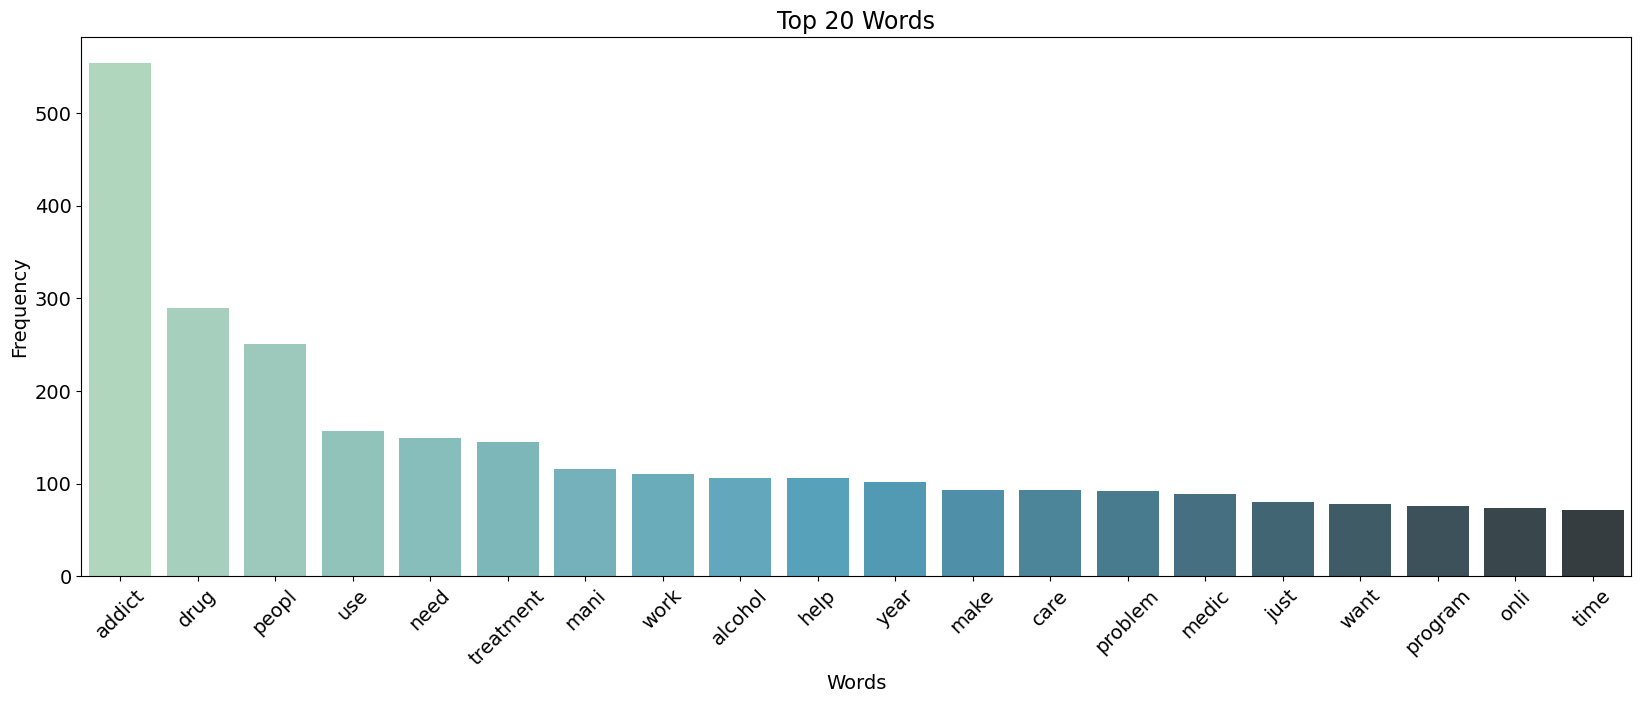

In [44]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)


plt.show()


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['processed_text']

tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

In [46]:
# !pip install gensim

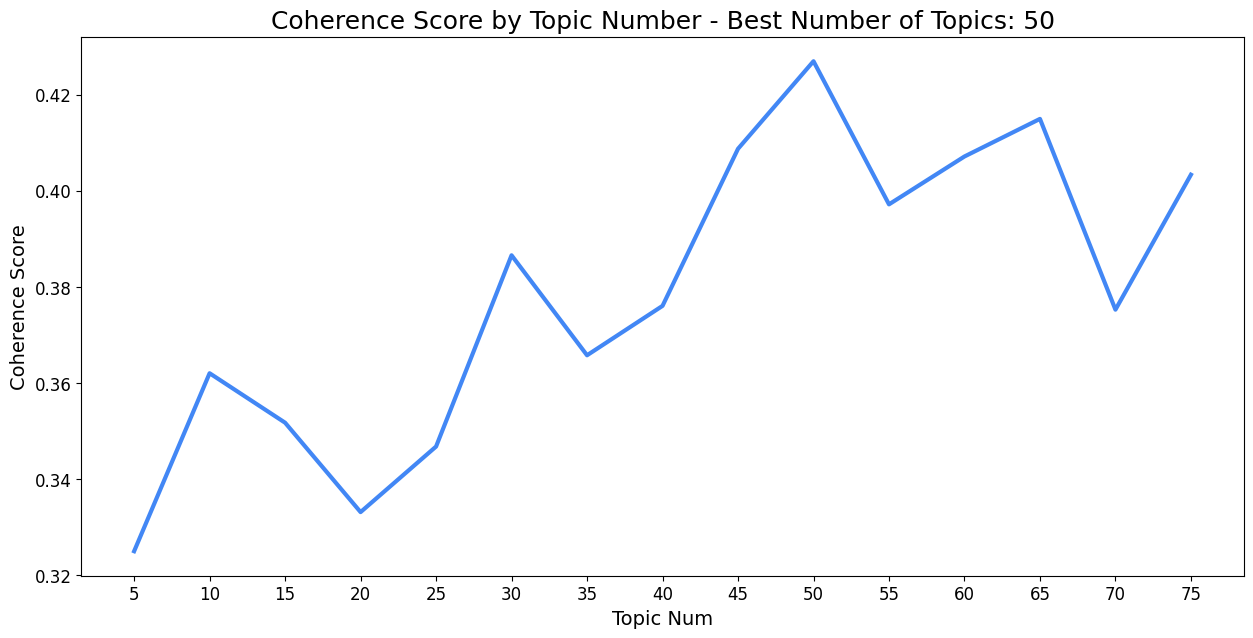

In [47]:
from gensim.corpora import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter
import matplotlib.pyplot as plt


# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [48]:
best_num_topics

50

In [49]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Now use the number of topics with the
# highest coherence score to run the
# sklearn nmf model

texts = df['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha_W=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [50]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()


,0,1,2,3,4,5,6,7,topics
0,medic,arrest,medic profession,profession,court,licens,peopl,probat,medic arrest profession court licens peopl probat
1,program,step,step program,recoveri,twelv step,twelv,addict,na,program step recoveri twelv addict na
2,disord,use disord,use,substanc use,substanc,alcohol use,biggest,associ,disord use substanc alcohol biggest associ
3,drug,use,drug use,user,war,legal,peopl,prison,drug use user war legal peopl prison
4,million,million american,american,american addict,addict,count,million peopl,popul,million american addict count peopl popul


In [51]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df.head()

,topic_num,topics
0,0,medic arrest profession court licens peopl probat
1,1,program step recoveri twelv addict na
2,2,disord use substanc alcohol biggest associ
3,3,drug use user war legal peopl prison
4,4,million american addict count peopl popul


In [52]:
# Creating a temp df with the url and topic num to join on
url = df['url'].tolist()

df_temp = pd.DataFrame({
    'url': url,
    'topic_num': docweights.argmax(axis=1)
})

# Merging to get the topic num with url
merged_topic = df_temp.merge(
    topic_df,
    on='topic_num',
    how='left'
)

# Merging with the original df
df_topics = pd.merge(
    df,
    merged_topic,
    on='url',
    how='left'
)

df_topics = df_topics.drop(
    'processed_text',
    axis=1
)

df_topics.head()

,url,body,word_count,topic_num,topics
0,https://www.nytimes.com/2023/12/13/opinion/add...,Addicts have been hiding behind the term 'dise...,72,48,ill mental need disabl diseas american healthi
1,https://www.nytimes.com/2023/12/13/opinion/add...,Addicts have been hiding behind the term 'dise...,72,48,ill mental need disabl diseas american healthi
2,https://www.nytimes.com/2023/12/13/opinion/add...,Addicts have been hiding behind the term 'dise...,72,23,fault clinic insur compani someon els alway do...
3,https://www.nytimes.com/2023/12/13/opinion/add...,Addicts have been hiding behind the term 'dise...,72,15,aa work rehab research read don investig member
4,https://www.nytimes.com/2023/12/13/opinion/add...,Addicts have been hiding behind the term 'dise...,72,34,whi answer know peopl mayb die live god


# LDA
*Reference: https://www.geeksforgeeks.org/nlp/topic-modeling-using-latent-dirichlet-allocation-lda/*

In [54]:
import gensim
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=3,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [55]:
# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.015*"treat" + 0.014*"veri" + 0.013*"behavior" + 0.011*"year" + 0.011*"mind" + 0.010*"noth" + 0.010*"meth" + 0.009*"clinic" + 0.008*"manag" + 0.008*"substanc"')
(1, '0.048*"addict" + 0.024*"drug" + 0.018*"peopl" + 0.013*"treatment" + 0.012*"use" + 0.012*"need" + 0.011*"mani" + 0.011*"medic" + 0.010*"alcohol" + 0.009*"work"')
(2, '0.028*"addict" + 0.017*"problem" + 0.017*"drug" + 0.015*"care" + 0.015*"health" + 0.014*"make" + 0.014*"peopl" + 0.013*"use" + 0.012*"person" + 0.011*"need"')
